# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [4]:
df = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']]

In [5]:
cat_cols = ['uid', 'labname']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
df_encoded

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df = df.drop(cat_cols, axis=1)
df = pd.concat([df, df_encoded], axis=1)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
continuous_cols = ['numTrials', 'hour']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df.to_csv('../data/dayofweek.csv', index=False)

In [9]:
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
y = df['dayofweek']
naive_accuracy = accuracy_score(y, [y.mode()[0]] * len(y))
naive_accuracy

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [11]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [12]:
def plot_feature_importance(coefficients, feature_names, top_n=10):
    importance = np.sum(np.abs(coefficients), axis=0)
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.nlargest(top_n)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Sum of Absolute Coefficients (Importance)')
    plt.title(f'Top {top_n} Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [13]:
base_logreg = LogisticRegression(random_state=21, fit_intercept=False, max_iter=100)
logreg = OneVsRestClassifier(base_logreg)
logreg.fit(X, y)

,estimator,LogisticRegre...ndom_state=21)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21


In [14]:
y_pred_logreg = logreg.predict(X)
logreg_accuracy = accuracy_score(y, y_pred_logreg)
print(f'Logistic Regression accuracy: {logreg_accuracy}')

Logistic Regression accuracy: 0.6209964412811388


In [15]:
coefs_list = []
for estimator in logreg.estimators_:
    coefs_list.append(estimator.coef_[0])

In [16]:
coefs = np.array(coefs_list)

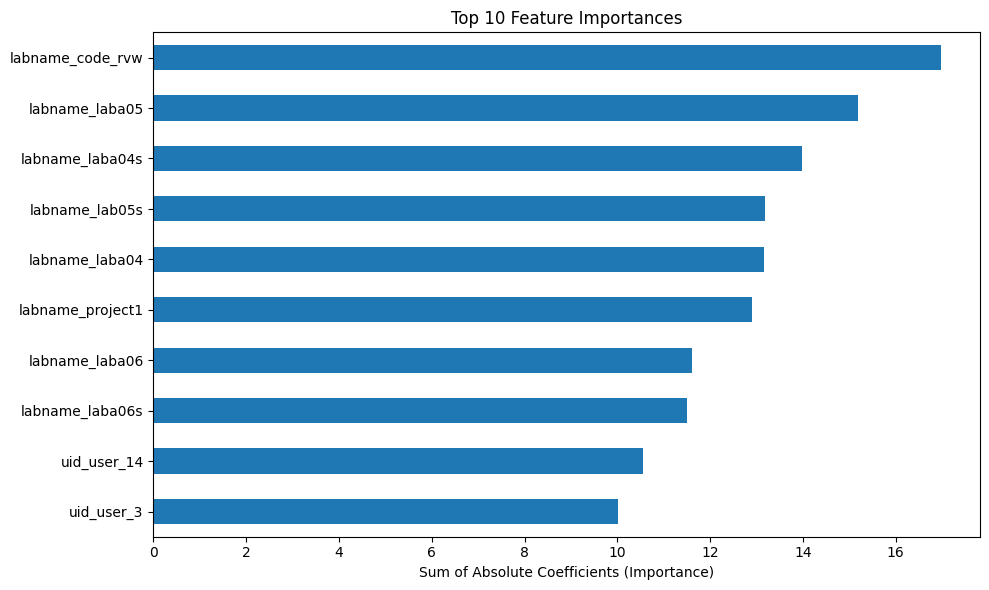

In [17]:
plot_feature_importance(coefs, X.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [18]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = None
best_svc = None

In [19]:
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X, y)
    y_pred = svc.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'SVC accuracy ({kernel}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_svc = svc

SVC accuracy (linear): 0.702846975088968
SVC accuracy (poly): 0.8594306049822064
SVC accuracy (rbf): 0.8558718861209964
SVC accuracy (sigmoid): 0.3997627520759193


In [20]:
svc_linear = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc_linear.fit(X, y)
y_pred_svc = svc_linear.predict(X)
svc_accuracy = accuracy_score(y, y_pred_svc)
svc_accuracy

0.6126927639383155

In [21]:
try:
    svc_coefs = np.array([est.coef_ for est in svc_linear.estimators_])  # Shape: (7, 1, 43)
    svc_coefs = svc_coefs.squeeze(axis=1)  # Убираем размерность 1, получаем (7, 43)
    importance = np.sum(np.abs(svc_coefs), axis=0)  # Суммируем по классам, получаем (43,)
    print(f"Shape of svc_coefs: {svc_coefs.shape}")
    print(f"Shape of importance: {importance.shape}")
    print(f"Number of features in X: {len(X.columns)}")
except AttributeError:
    print("Error SVC.")
    raise

Shape of svc_coefs: (7, 43)
Shape of importance: (43,)
Number of features in X: 43


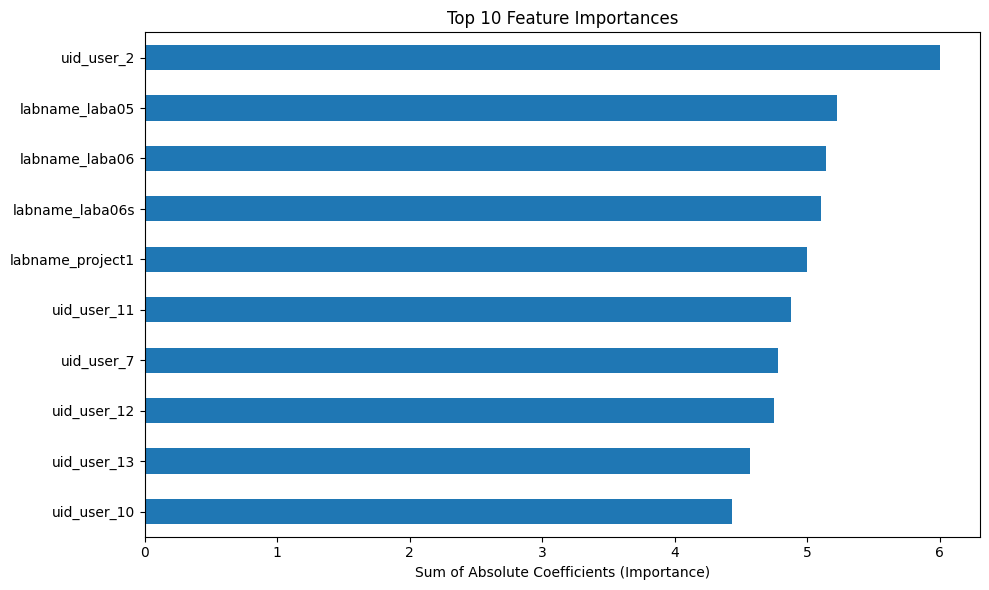

In [22]:
plot_feature_importance(svc_coefs, X.columns, top_n=10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [23]:
depths = [2, 4, 6, 8]
best_accuracy = 0
best_depth = None
best_tree = None

In [24]:
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=21)
    tree.fit(X, y)
    y_pred = tree.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Decision Tree accuracy (max_depth={depth}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        best_tree = tree

Decision Tree accuracy (max_depth=2): 0.4389086595492289
Decision Tree accuracy (max_depth=4): 0.5516014234875445
Decision Tree accuracy (max_depth=6): 0.6637010676156584
Decision Tree accuracy (max_depth=8): 0.7502965599051008


In [25]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X, y)
y_pred = tree.predict(X)
accuracy_score(y, y_pred)

0.5516014234875445

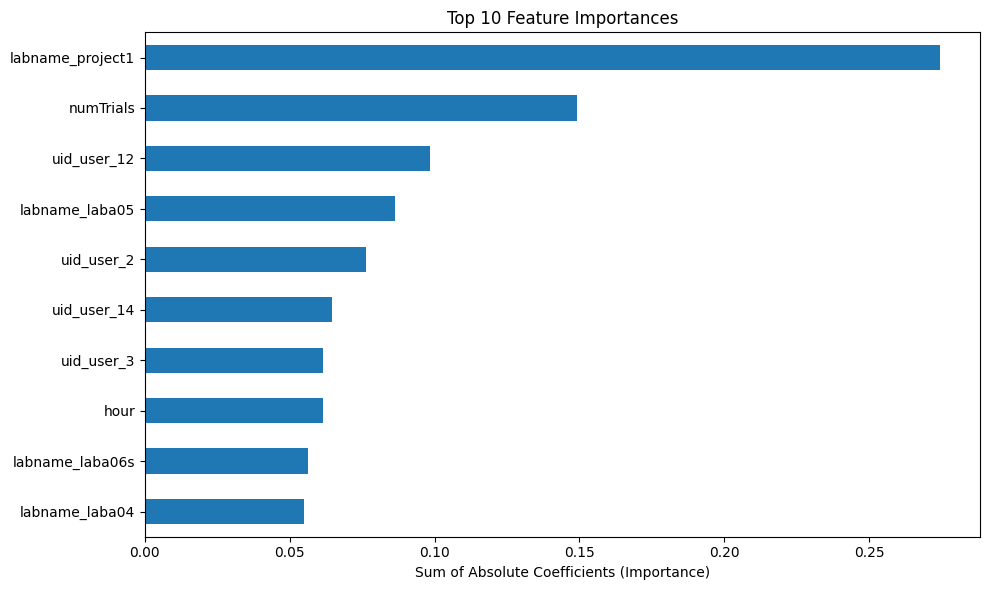

In [26]:
plot_feature_importance(tree.feature_importances_.reshape(1, -1), X.columns, top_n=10)


### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [27]:
depths = [10, 25, 50]
estimators = [50, 100, 200]
best_accuracy = 0
best_params = None
best_rf = None

In [28]:
for depth in depths:
    for n_est in estimators:
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=21)
        rf.fit(X, y)
        y_pred = rf.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print(f'Random Forest accuracy (max_depth={depth}, n_estimators={n_est}): {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = (depth, n_est)
            best_rf = rf

Random Forest accuracy (max_depth=10, n_estimators=50): 0.8701067615658363
Random Forest accuracy (max_depth=10, n_estimators=100): 0.8855278766310795
Random Forest accuracy (max_depth=10, n_estimators=200): 0.8778173190984578
Random Forest accuracy (max_depth=25, n_estimators=50): 1.0
Random Forest accuracy (max_depth=25, n_estimators=100): 1.0
Random Forest accuracy (max_depth=25, n_estimators=200): 1.0
Random Forest accuracy (max_depth=50, n_estimators=50): 1.0
Random Forest accuracy (max_depth=50, n_estimators=100): 1.0
Random Forest accuracy (max_depth=50, n_estimators=200): 1.0


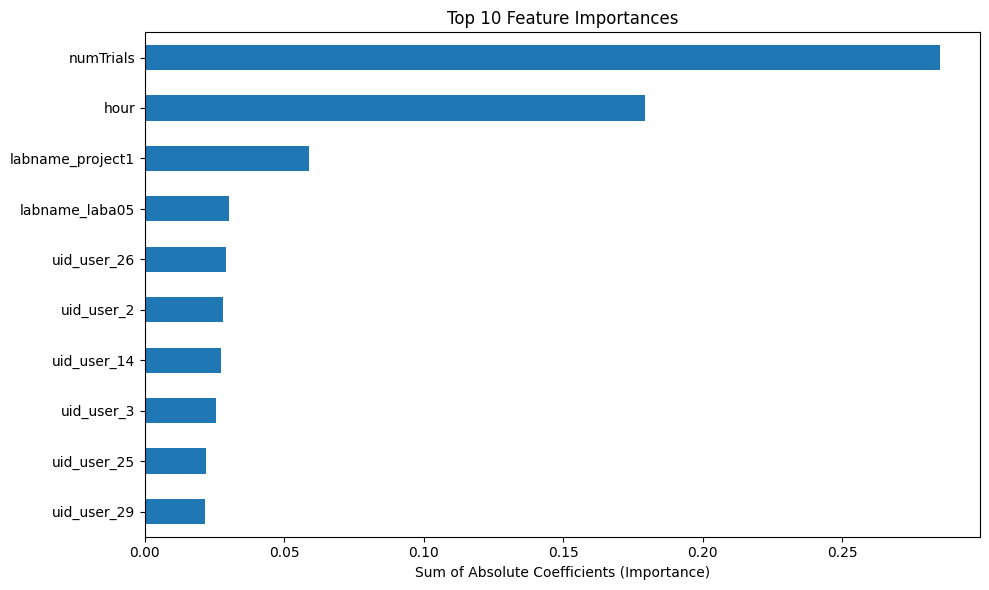

1.0

In [29]:
rf_baseline = RandomForestClassifier(max_depth=25, n_estimators=100, random_state=21)
rf_baseline.fit(X, y)
plot_feature_importance(rf_baseline.feature_importances_.reshape(1, -1), X.columns, top_n=10)
y_pred = rf_baseline.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy